In [1]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline


In [2]:
filePath="E:\\train\\train\\543.txt"

In [3]:
# Open the file in read mode with UTF-8 encoding
with open(filePath, 'r', encoding='utf-8') as file:
    # Read the entire contents of the file
    file_contents = file.read()

# Print the contents of the file
print(file_contents)

బూరుగుపాలెం, విశాఖపట్నం జిల్లా, మాకవరపాలెం మండలానికి చెందిన గ్రామము. ఇది మండల కేంద్రమైన మాకవరపాలెం నుండి 7 కి. మీ. దూరం లోను, సమీప పట్టణమైన అనకాపల్లి నుండి 42 కి. మీ. దూరంలోనూ ఉంది. 2011 భారత జనగణన గణాంకాల ప్రకారం ఈ గ్రామం 1271 ఇళ్లతో, 4620 జనాభాతో 1798 హెక్టార్లలో విస్తరించి ఉంది. గ్రామంలో మగవారి సంఖ్య 2249, ఆడవారి సంఖ్య 2371. షెడ్యూల్డ్ కులాల సంఖ్య 262 కాగా షెడ్యూల్డ్ తెగల సంఖ్య 1. గ్రామం యొక్క జనగణన లొకేషన్ కోడ్ 586300.పిన్ కోడ్: 531113.
గ్రామంలో ప్రభుత్వ ప్రాథమిక పాఠశాలలు నాలుగు, ప్రైవేటు ప్రాథమిక పాఠశాలలు మూడు, ప్రభుత్వ ప్రాథమికోన్నత పాఠశాల ఒకటి, ప్రైవేటు ప్రాథమికోన్నత పాఠశాల ఒకటి, ప్రభుత్వ మాధ్యమిక పాఠశాల ఒకటి ఉన్నాయి. సమీప బాలబడి మాకవరపాలెంలో ఉంది.సమీప జూనియర్ కళాశాల నర్సీపట్నంలోను, ప్రభుత్వ ఆర్ట్స్ / సైన్స్ డిగ్రీ కళాశాల మాకవరపాలెంలోనూ ఉన్నాయి. సమీప వైద్య కళాశాల విశాఖపట్నంలోను, మేనేజిమెంటు కళాశాల, పాలీటెక్నిక్‌లు నర్సీపట్నంలోనూ ఉన్నాయి. సమీప వృత్తి విద్యా శిక్షణ పాఠశాల నర్సీపట్నంలోను, అనియత విద్యా కేంద్రం అనకాపల్లిలోను, దివ్యాంగుల ప్రత్యేక పాఠశాల విశాఖపట్నం లోనూ ఉన్నాయి.
బూరుగు

In [4]:
from googletrans import Translator

def translate_telugu_to_english(text):
    translator = Translator()
    translated_text = translator.translate(text, src='te', dest='en')
    return translated_text.text

telugu_text = file_contents
file_contents = translate_telugu_to_english(telugu_text)
print("English Translation:", file_contents)


English Translation: A village belonging to the Makavarapalem zone of Boruppalem, Visakhapatnam district.It is 7 km from Makavarapalem, the center of the zone.Me.42 km from Anakapalli, the nearest town.Me.There is also a distance.According to the 2011 Indian census, the village is spread over 1798 hectares with 1271 houses and 4620 population.The number of males in the village is 2249, the number of females is 2371. The number of scheduled castes is 262 while the number of scheduled tribes 1. The population location code of the village is 586300.pin Code: 531113.
There are four public primary schools in the village, three private primary schools, one government high school, one private high school and one government secondary school.The nearest child is in Makavarapalem. The Junior College is in Narsipatnam and the Government Arts / Science Degree College is in Makavarapalem.The nearest medical college is in Visakhapatnam, Management College and Polytechnic in Narsipatnam.The nearest V

In [5]:
list=[".","?","!","-"]
def add_space_after_full_stop(text):
    result = ""
    for i in range(len(text)):
        result += text[i]
        if text[i] in list:
            # Check if the next character is not a space
            if i + 1 < len(text) and text[i + 1] != " ":
                result += " "
    return result

file_contents = add_space_after_full_stop(file_contents)
print("English Translation with Spaces:", file_contents)


English Translation with Spaces: A village belonging to the Makavarapalem zone of Boruppalem, Visakhapatnam district. It is 7 km from Makavarapalem, the center of the zone. Me. 42 km from Anakapalli, the nearest town. Me. There is also a distance. According to the 2011 Indian census, the village is spread over 1798 hectares with 1271 houses and 4620 population. The number of males in the village is 2249, the number of females is 2371. The number of scheduled castes is 262 while the number of scheduled tribes 1. The population location code of the village is 586300. pin Code: 531113. 
There are four public primary schools in the village, three private primary schools, one government high school, one private high school and one government secondary school. The nearest child is in Makavarapalem. The Junior College is in Narsipatnam and the Government Arts / Science Degree College is in Makavarapalem. The nearest medical college is in Visakhapatnam, Management College and Polytechnic in Na

In [6]:
import nltk
from nltk.tokenize import sent_tokenize

# Download NLTK resources (if not already downloaded)
#nltk.download('punkt')

def tokenize_sentences(text):
    sentences = sent_tokenize(text)
    return sentences

# Example English text
english_text = file_contents

# Tokenize the text into sentences
sentences = tokenize_sentences(english_text)
print("Sentences:")
for sentence in sentences:
    print(sentence)


Sentences:
A village belonging to the Makavarapalem zone of Boruppalem, Visakhapatnam district.
It is 7 km from Makavarapalem, the center of the zone.
Me.
42 km from Anakapalli, the nearest town.
Me.
There is also a distance.
According to the 2011 Indian census, the village is spread over 1798 hectares with 1271 houses and 4620 population.
The number of males in the village is 2249, the number of females is 2371.
The number of scheduled castes is 262 while the number of scheduled tribes 1.
The population location code of the village is 586300. pin Code: 531113.
There are four public primary schools in the village, three private primary schools, one government high school, one private high school and one government secondary school.
The nearest child is in Makavarapalem.
The Junior College is in Narsipatnam and the Government Arts / Science Degree College is in Makavarapalem.
The nearest medical college is in Visakhapatnam, Management College and Polytechnic in Narsipatnam.
The nearest 

In [7]:
doc = nlp(sentences[0])

for tok in doc:
  print(tok.text, "...", tok.dep_)

A ... det
village ... ROOT
belonging ... acl
to ... prep
the ... det
Makavarapalem ... compound
zone ... pobj
of ... prep
Boruppalem ... nmod
, ... punct
Visakhapatnam ... compound
district ... pobj
. ... punct


In [8]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [9]:
get_entities(sentences[0])

['', 'Boruppalem Visakhapatnam district']

In [10]:
entity_pairs = []

for i in tqdm(sentences):
  entity_pairs.append(get_entities(i))

100%|██████████████████████████████████████████████████████████████████████████████████| 76/76 [00:01<00:00, 65.45it/s]


In [11]:
print(entity_pairs[0:])

[['', 'Boruppalem Visakhapatnam district'], ['It', '7  zone'], ['', ''], ['', 'km  Anakapalli'], ['', ''], ['', ''], ['Indian  village', '1271  houses'], ['number', 'females'], ['number', 'scheduled  tribes'], ['population location code', 'village'], ['', 'primary  village'], ['nearest  child', 'Makavarapalem'], ['Junior College', 'Government Arts Science Degree Makavarapalem'], ['medical  college', 'Management Narsipatnam'], ['nearest Vocational Training School', 'Divyangu Special Visakhapatnam'], ['', 'basic health Borepalem'], ['', 'primary health sub center'], ['One', 'paramedical  staff'], ['', 'veterinary  clinic'], ['social health center', 'km  village'], ['', 'distance'], ['', 'nomadic  medicine'], ['', 'distance'], ['', '10 Child Care hospital'], ['', ''], ['Allopathy Hospital', 'km Family Welfare village'], ['', ''], ['Protected drinking water', 'village'], ['Water', 'wells'], ['village', 'year'], ['Water', 'also  borewells'], ['Drinking water', 'wagu  river'], ['Wastewater',

In [12]:
import spacy
from spacy.matcher import Matcher

# Load the English language model
nlp = spacy.load("en_core_web_sm")

def get_relation(sent):
    doc = nlp(sent)

    # Matcher class object
    matcher = Matcher(nlp.vocab)

    # Define the pattern
    pattern = [{'DEP': 'ROOT'}, 
               {'DEP': 'prep', 'OP': "?"},
               {'DEP': 'agent', 'OP': "?"},  
               {'POS': 'ADJ', 'OP': "?"}] 

    matcher.add("matching_1", [pattern])  # Corrected line

    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]] 

    return span.text



In [13]:
get_relation("John completed the task")

'completed'

In [14]:
print(get_relation("He directed Bahubali"))

directed


In [15]:
relations = [get_relation(i) for i in tqdm(sentences)]

100%|██████████████████████████████████████████████████████████████████████████████████| 76/76 [00:01<00:00, 59.07it/s]


In [16]:
pd.Series(relations).value_counts()[:50]

is                     22
are                     6
Are in                  5
Is in                   5
located at              4
is in                   3
has                     3
Me                      2
from                    2
Center                  2
Are more                2
ATM                     1
going through           1
village                 1
disposed of next        1
supplied for            1
carried                 1
produced in             1
done in                 1
received throughout     1
implemented in          1
sent to                 1
flows in public         1
flows through open      1
receives                1
supplied by             1
has paramedical         1
located in              1
Code                    1
spread over             1
Rice                    1
Name: count, dtype: int64

In [17]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [18]:
print(kg_df)

              source                             target          edge
0                     Boruppalem Visakhapatnam district       village
1                 It                            7  zone            is
2                                                                  Me
3                                        km  Anakapalli          from
4                                                                  Me
..               ...                                ...           ...
71                                 power supply village            is
72             Power               commercial  purposes  supplied for
73      Water supply                 following  sources       carried
74  following  items                             boring   produced in
75                                                               Rice

[76 rows x 3 columns]


In [19]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

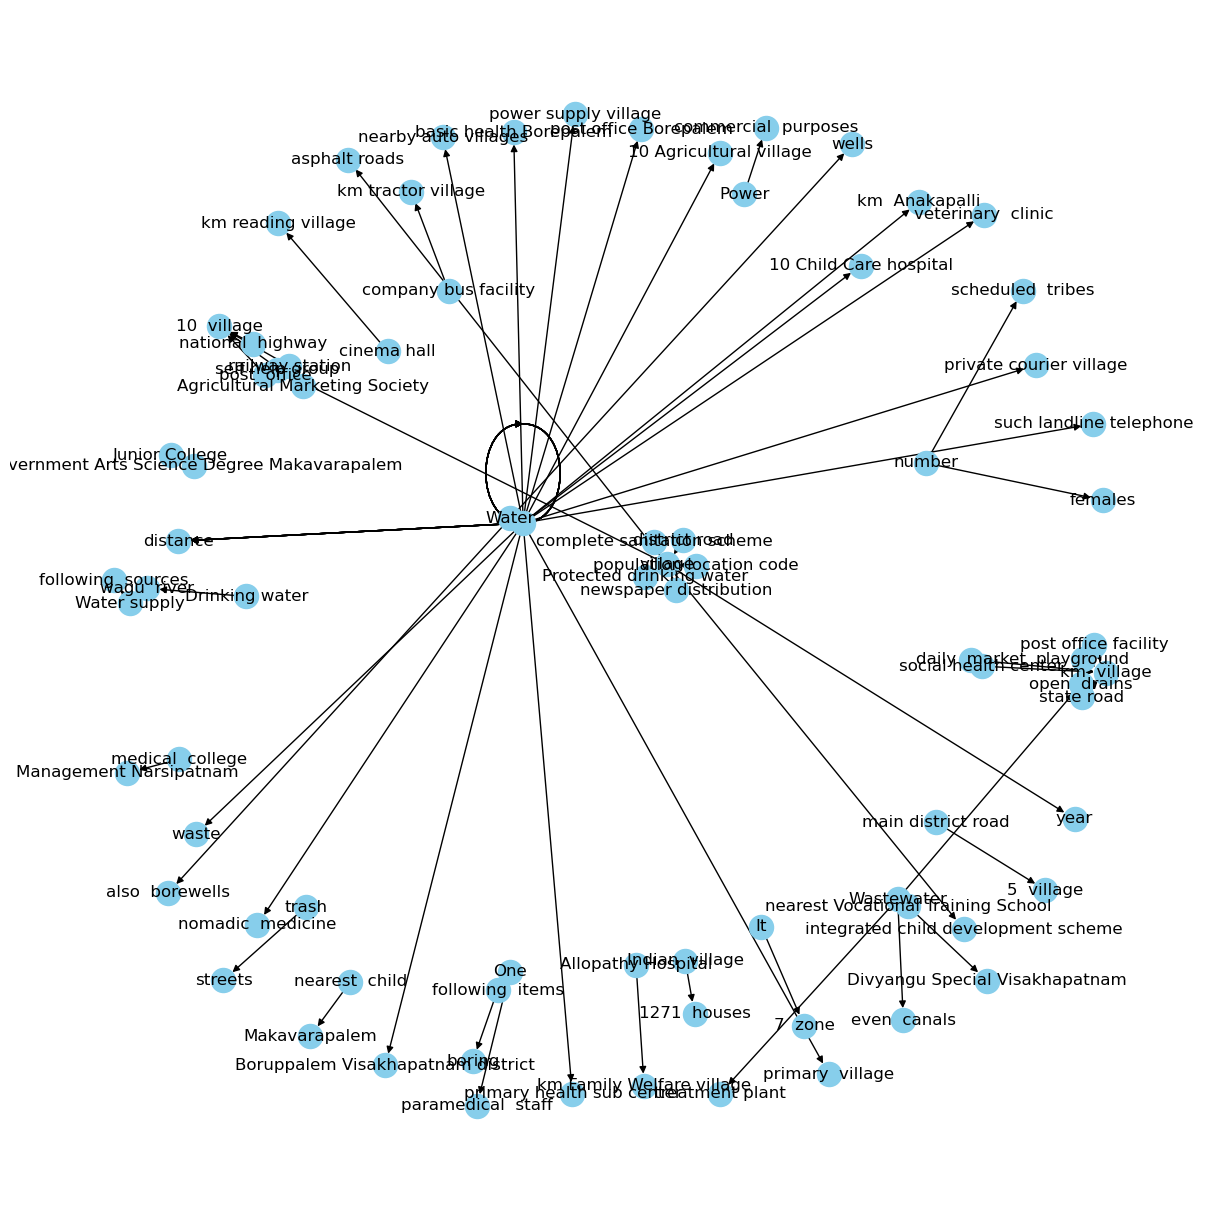

In [20]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()